# Example of an end to end ML project

Source: Hands-On Machine Learning witch Scikit-Learn, Keras & Tensorflow by Aurelien Geron

**Main steps**
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare data for ML algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present solution
8. Lunch, monitor, and maintain your system

## Imports

In [1]:
import os
import tarfile
import urllib

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

%matplotlib inline

Hint Go thorugh a default check list. This works well for a lot of projects and gives you a starting piont that can be adpted to your needs.

# 1. Look at the big picture

#### 1.1 Frame the problem.
*Theory* <br>
A. What is the business objective? How does your organization aims to benefit from the mode? A good understanding here will help to frame the problem, algorithms to use, performance measurements, and prioritization. Ask what the current solution is, if there is any. This will give you a reference for performance and what to solve. <br> 
B. What system to use? Supervised, unsupervised, reinforcement learning, classification, etc. <br>

*Example* <br>
A. The model should predict if it is worth it to invest in a given area or not (price estimates / market price). Current solution is done manually, time cosuming and costly. The error is ca. 20%. <br>
B. Supervised learning task (given labled data-set), muliple univariant regression task (use of muliple features to predict a numeric value for each district), and plain batch learning (No data stream or need to rapidly adjust data and small enough to fit into memory).  

#### 1.2 Select performance measure
*Theory & Example* <br>
Typical performance measure for a regression system is the Root Mean Square Error. Good estimate for errors with high weight on large errors. 

#### 1.3 Check Assumptions
*Theory* <br>
Check assumptions to avoide mistakes early on. (Communication!)

*Example* <br>
We predict prices but we need to check if the downstream team will not actually convert our estimates into categories.

# 2. Get the data 

#### 2.1 Download

In [3]:
# Download data set - Set variables
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Download data set, unpack, and store data to local drive.
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [4]:
# Load data into memory
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

#### 2.2 Quick look

In [5]:
# Quick look at data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Get statistics of data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Get more quick infos about data shape and types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*Observations:* <br>
Each row represents a district. There are 10 attributes. There are 20,640 instances in the dataset. Some columns (total_bedrooms) do not add up to that number => missing features. All attributes, excpet ocean_proximity, are numeric. We loaded a .csv to we know it must be text attribute if not numeric. Looking ar the first rows of ocean_proximity we see repition, is it a catergorical attribute? *Next step: Look at ocean_proximity*

In [8]:
# Get more ocean_proximity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

*Observation* <br>
5 unique values over all instances => categories.

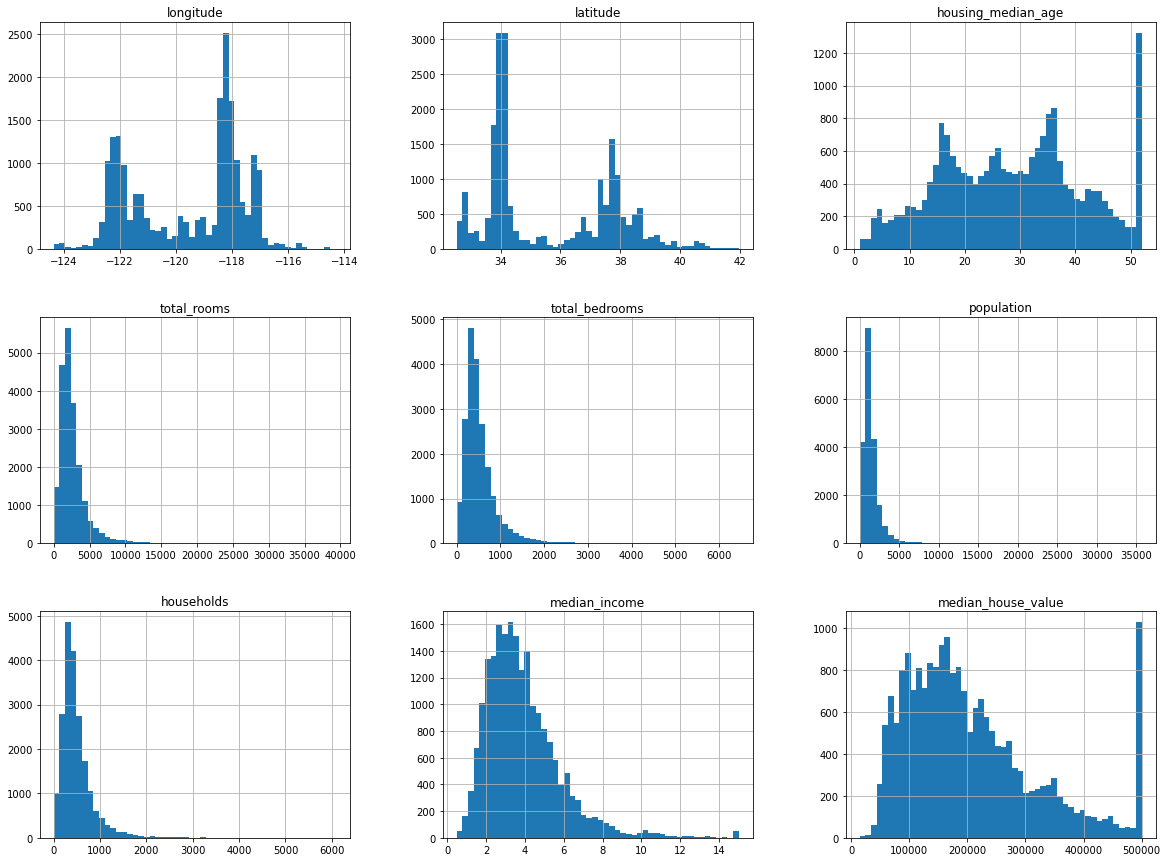

In [9]:
# Visualize
housing.hist(bins=50, figsize=(20,15))
plt.show()

*Observations* <br>
1. Median income does not seem to be in USA. Check this => Data set is scaled and caped at 15 for higher income and 0.5 for lower income. These roughly represent 10.000USD this 3 == 30.000USD. *Note* this is a pre-processed attribute. <br>
2. Housing median age and median income are also capped. This might our alogithm to think learn that prices never go beyong that limit. Check if it is necessary to predict behind the limit. IF Ture: either remove those instances from the dataset or gather more date (to inlcude data above the limit). <br>
3. Attributes have different scales.
4. Many histograms are tail-heavy. This makes it harder for some algorithms to detect (the correc) patterns.

#### 2.3 Create a test set

Avoid **data snooping** as our brain is amazing at pattern detection thus might implement a bias early on. Thus we create a test-set early on of roughly 20% of the data set. It is important to always sample / split-off the same data so the model does not get exposed to all data though different runs. This has to be the case even on changes to the dataset. Next, random sampling might introduce a sampling bias. We need to **stratify** the sampling data. Make your you represent each strata accordingly (to few strats=no representation, to many=not enough data per strata).

In [10]:
# Input: Median income is important featute => Straify data along.
# Balance number of strate vs data/strata
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

In [11]:
# Split off stratified (income_cat) test-set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Compare the split test set to the original test set.

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

*Observation* <br>
The test set has the same proportions as the main set.

In [14]:
# Remove the category again  # Artificially added data.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3. Discover and visualization

In [15]:
# Make a copy of the training set to work with.
housing = strat_train_set.copy()

#### 3.1 Visualize

In [16]:
# Download the California image
images_path = os.path.join("./", "images")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x146668ca0>)

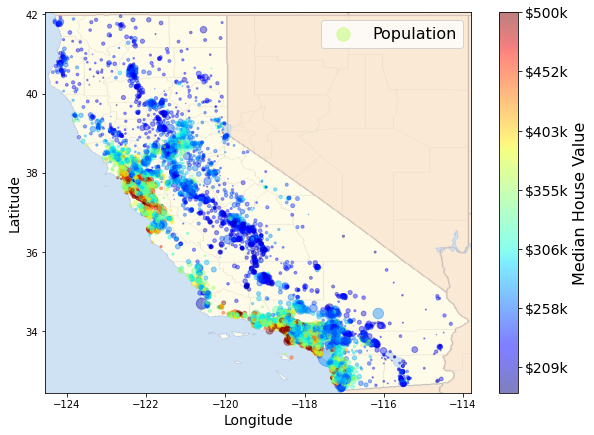

In [17]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

#### 3.2 Correlations

Remember, the correlation coefficient only measures linear correlatons and might miss out non linear correlations

In [18]:
# Calculate pearson-correlation
corr_matrix = housing.corr()

# Correlation example of attributes to median_house_value correlation.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

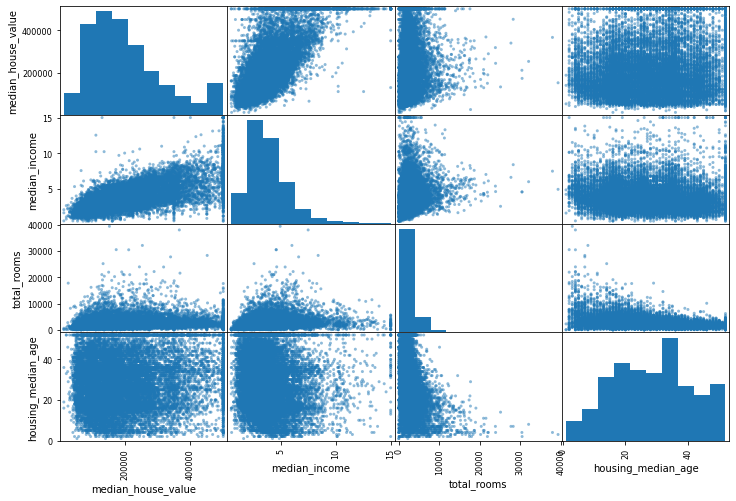

In [19]:
# Plot pearson correlations via Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Investiagate a promising attribute, median-income.

*Observations*
- We can see the 500 000 cap in the median_house_value.
- Seemingly more caps at 480 000, 350 000 and others.
- Clear upwards trend.

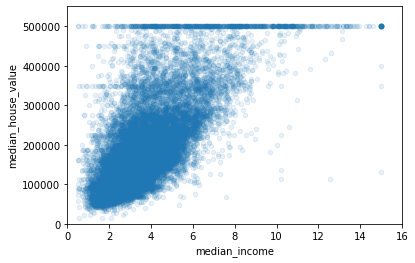

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

#### 3.3 Attribute combinations

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

*Obervation* We can see that the bedroom to room ration is strong correlated to the median-house-value then total_rooms or total_bedrooms. This is an example of an insight you can gain by just playing the data. This step it not ment to be exaustive but a chance to play through some ideas.

# 4. Preparation

#### 4.1 Cleaning

In [23]:
# Revert to clean data set & seperate predictors and lables as we want to apply
# different transformations to them.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Dealing with missing features:** <br>
| Get rid of entries with missing feature <br>
| Get rid of attribute <br>
| Set a value

In [26]:
# Use sklearn simple imputer to fill missing values fields.
# Works only with numerical data, thus apply on a copy without ocean-proximity.
from sklearn.impute import SimpleImputer

# Initi imputer and set strategy.
imputer = SimpleImputer(strategy="median")

# Create copy of purely numerical data.
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit imputer to these data.
imputer.fit(housing_num)

# Transform training set
X = imputer.transform(housing_num)

The imputer is now trained, us it to fill the training set and future data.

**Dealing with cateforical data**
- Algorithms prefer numerical data.

In [29]:
# OrdinalEncoder encodes catergorical attributes as numericals.
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

*Problem:* The ML algorithm might assume that close numerical values are similar.
A solution is one-hot-encoding, a sparse matrix with entries as rows and catergory
(numerical) as columns where a 1 marks the category.

In [30]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

*Note:* To many categories might lead to performance problmes, evene with sparse
matrices. We could try to find a nother useful numerical feature. i.e. distance
to the ocean in our case.

#### 4.2 Custom Transformers

At one point we will need to write our own transformators. Keep them in keep thier API consisten with the sklearn-API. Simply add 3 methods, transform(), fit(), and fit_transform().

In [33]:
# Example that adds the adds the combined attributes from before.
from sklearn.base import BaseEstimator, TransformerMixin


# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """ Example of a custome transformer.
    
        1 hyperparameter (add_beedrooms_per_room).
        This transformer allows easy add (or not) add_beedrooms_per_room
        to find out if adding this attributes gives some insight.
    """
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[
                X,
                rooms_per_household,
                population_per_household,
                bedrooms_per_room
            ]        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### 4.3 Feature scaling

Algorithms do not perform well when features are not scaled. We have 2 options, min-max scaling (normalization) and standarization.

- normalization: Values are shifted and rescaled to values between 0 and 1. ((x - min) / max);
- standardization: Subtract the mean (standardized values always have a mean of 0) && devide by the standard-deviation so that the resulting distribution has a unit variance. ((x - mean) / std). Unlike min-max this does not bound values to specific ranges wich can be a problem for some algirithms. However, it is much less affected by outliers. 

#### 4.4 Transformation pipelines
Organize transformation steps execute in the correct order.

In [36]:
# Pipleline calls fit_transdormer() sequencially on all transformers.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
# Bundle columns transformers (numerical & catergorical).
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# Glossary in order in which they appear during this chapter. 

Pipelines: Sequence of data processing components. They ususally work asynchronously and are connected via the data store. Here each component pulls data from a store, process is and stores the reults in another store.

Notation: <br>

m: number of instances in a dataset. <br>
x^i: feature vector. <br>
X: matrix containing all feature vectors of all dataset instances. <br>
h: sytems prediction function. <br>
RMSE(X,h): cost function. <br>